In [ ]:
!nvidia-smi #What GPU are we using?

Wed Aug 17 15:37:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    32W /  70W |    318MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

#Used to build and deploy Machine Learning Apps
import tensorflow as tf

#Deep Learning APIs for creating Neural Networks(Runs on Tensorflow)
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Scikit-learn : machine learning library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Used for accessing files and file names
import pathlib 
import os

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Function grabs a random image from a directory
def display_random_image(dir, class_type):
    # Define directory to look in
    img_dir = dir + "/" + class_type
    
    # Get files from directory
    files = os.listdir(img_dir)
    
    # Pick a random image from that directory
    img_name = random.choice(files)
    
    # Read in the image
    img = mpimg.imread(img_dir + "/" + img_name)
    
    # Plot image with title & shape
    plt.imshow(img)
    plt.title(class_type)
    plt.axis("off");
    
    # Show the shape of the image
    print(f"Image shape: {img.shape}") 

    # So we can see how the computer sees the image
    # The image is understood as a big tensor with each pixel being
    # represented with RGB color amounts between 0 & 255
    # return img

Image shape: (512, 512, 3)


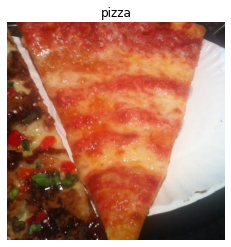

In [ ]:
# Show random pizza
display_random_image("/content/gdrive/MyDrive/data/hotdog_pizza",
                    "pizza")

Image shape: (512, 512, 3)


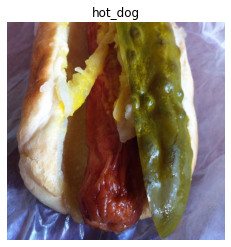

In [ ]:
# Show random hotdog
display_random_image("/content/gdrive/MyDrive/data/hotdog_pizza",
                    "hot_dog")

In [ ]:
#Training and Test dataset directories
data_dir = "/content/gdrive/MyDrive/data/hotdog_pizza/"

# Import data, turn it into batches of 32 with a size of 256x256
# Batch : We loop through batches of 32 images to minimize 
# memory requirements
# Works with PNG, JPG, BMP, PPM, TIF files
training_data = tf.keras.utils.image_dataset_from_directory(directory = data_dir,
                                                            validation_split = 0.2,
                                                            subset = "training",
                                                            batch_size = 32, 
                                                            image_size = (256, 256),
                                                            seed = 53)
validation_data = tf.keras.utils.image_dataset_from_directory(directory = data_dir,
                                                            validation_split = 0.2,
                                                            subset = "validation",
                                                            batch_size = 32, 
                                                            image_size = (256, 256),
                                                            seed = 53)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [ ]:
class_names = training_data.class_names #Get class names
print(class_names)

['hot_dog', 'pizza']


In [ ]:
# Normalize pixel values between 0 & 1
# Each pixel is currently values between 0 & 255 for RGB colors
# Neural networks work best with normalized data
# Divide all values by the max value 255
norm_layer = tf.keras.layers.Rescaling(1/255.)
training_data_norm = training_data.map(lambda x, y: (norm_layer(x), y)) # Apply the division to all data in traing data set
validation_data_norm = validation_data.map(lambda x, y: (norm_layer(x), y)) # Do same for test (validation) dataset

In [ ]:
#Check for Normalization
image_batch, label_batch = next(iter(training_data_norm))
image_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.19117649, 0.35000002, 0.6960785 ],
        [0.19411767, 0.3539216 , 0.6892157 ],
        [0.1637255 , 0.327451  , 0.64607847],
        ...,
        [0.03431373, 0.01666667, 0.1392157 ],
        [0.04117647, 0.01372549, 0.15      ],
        [0.02058824, 0.        , 0.1382353 ]],

       [[0.19509806, 0.33039218, 0.6539216 ],
        [0.1764706 , 0.32156864, 0.6333334 ],
        [0.15588236, 0.3029412 , 0.61078435],
        ...,
        [0.02941177, 0.0254902 , 0.17450981],
        [0.03137255, 0.01862745, 0.13431373],
        [0.03431373, 0.01568628, 0.11078432]],

       [[0.14705883, 0.25882354, 0.5529412 ],
        [0.15392157, 0.27352944, 0.5647059 ],
        [0.19411767, 0.32254905, 0.61960787],
        ...,
        [0.01176471, 0.03235294, 0.29607844],
        [0.00980392, 0.01862745, 0.2137255 ],
        [0.01568628, 0.01764706, 0.1754902 ]],

       ...,

       [[0.08921569, 0.17352942, 0.5147059 ],
        [0.06

In [ ]:
#Non-CNN Model on Data
tf.random.set_seed(53)
model_1 = Sequential([
    Flatten(input_shape = (256, 256, 3)),
    Dense(4, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
model_1.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
history_1 = model_1.fit(training_data_norm,
                        epochs = 5,
                        validation_data = validation_data_norm,
                        validation_steps = len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 7s 116ms/step - loss: 1.0049 - accuracy: 0.4931 - val_loss: 0.6930 - val_accuracy: 0.5375
Epoch 2/5
50/50 [==============================] - 6s 108ms/step - loss: 0.6932 - accuracy: 0.4906 - val_loss: 0.6931 - val_accuracy: 0.5375
Epoch 3/5
50/50 [==============================] - 6s 105ms/step - loss: 0.6932 - accuracy: 0.4831 - val_loss: 0.6932 - val_accuracy: 0.4625
Epoch 4/5
50/50 [==============================] - 6s 105ms/step - loss: 0.6932 - accuracy: 0.5094 - val_loss: 0.6934 - val_accuracy: 0.4625
Epoch 5/5
50/50 [==============================] - 6s 103ms/step - loss: 0.6931 - accuracy: 0.5094 - val_loss: 0.6935 - val_accuracy: 0.4625


In [ ]:
# Look at all those parameters and still we got terrible results
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 786436    
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 786,461
Trainable params: 786,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Non-CNN Model on Data with More Layers
tf.random.set_seed(72)
model_2 = Sequential([
    Flatten(input_shape = (256, 256, 3)),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
model_2.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
history_2 = model_2.fit(training_data_norm,
                        epochs = 5,
                        validation_data = validation_data_norm,
                        validation_steps = len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 7s 109ms/step - loss: 4.2279 - accuracy: 0.5644 - val_loss: 2.3535 - val_accuracy: 0.6025
Epoch 2/5
50/50 [==============================] - 6s 106ms/step - loss: 1.0718 - accuracy: 0.6525 - val_loss: 1.0096 - val_accuracy: 0.6325
Epoch 3/5
50/50 [==============================] - 6s 106ms/step - loss: 1.4776 - accuracy: 0.6356 - val_loss: 0.6161 - val_accuracy: 0.6925
Epoch 4/5
50/50 [==============================] - 6s 108ms/step - loss: 0.6126 - accuracy: 0.7156 - val_loss: 0.7554 - val_accuracy: 0.6200
Epoch 5/5
50/50 [==============================] - 6s 104ms/step - loss: 0.9581 - accuracy: 0.6319 - val_loss: 0.7081 - val_accuracy: 0.6475


In [ ]:
#Better but still not good
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 196608)            0         
                                                                 
 dense_14 (Dense)            (None, 100)               19660900  
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 19,681,201
Trainable params: 19,681,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(72)
model_3 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3, # can also be (3, 3)
           input_shape = (256,256,3),
           activation = 'relu'), # first layer specifies input shape (height, width, colour channels)
    Conv2D(10, 3, activation = 'relu'), # Filters, Kernel Size, activation
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid') # Binary activation output layer
])
#Compile the Model 
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
#Fit the Model
history_3 = model_3.fit(training_data_norm,
                        steps_per_epoch = len(training_data_norm), #Steps through 50 batches of 32
                        epochs = 5,
                        validation_data = validation_data_norm, #Validate while fitting
                        validation_steps = len(validation_data_norm) # Steps through test data in batches of 32
                        )

Epoch 1/5
50/50 [==============================] - 16s 127ms/step - loss: 0.7059 - accuracy: 0.6438 - val_loss: 0.5726 - val_accuracy: 0.6875
Epoch 2/5
50/50 [==============================] - 7s 124ms/step - loss: 0.4951 - accuracy: 0.7606 - val_loss: 0.5180 - val_accuracy: 0.7575
Epoch 3/5
50/50 [==============================] - 7s 126ms/step - loss: 0.3635 - accuracy: 0.8581 - val_loss: 0.4696 - val_accuracy: 0.7650
Epoch 4/5
50/50 [==============================] - 7s 125ms/step - loss: 0.2032 - accuracy: 0.9362 - val_loss: 0.6237 - val_accuracy: 0.7175
Epoch 5/5
50/50 [==============================] - 7s 126ms/step - loss: 0.0981 - accuracy: 0.9775 - val_loss: 0.6649 - val_accuracy: 0.7375


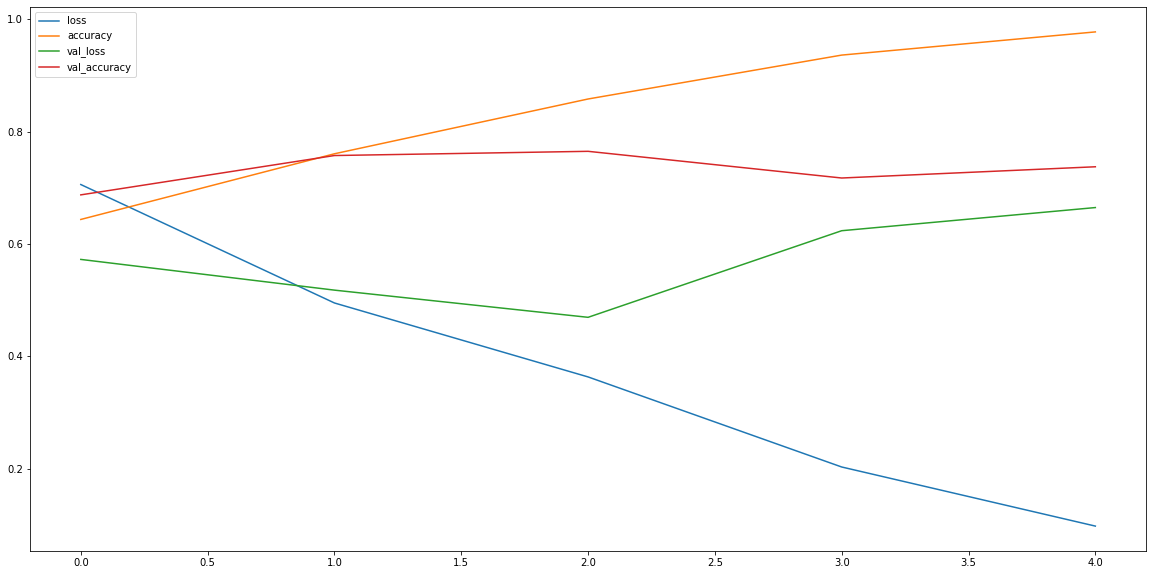

In [ ]:
pd.DataFrame(history_3.history).plot(figsize = (20,10)) #Plot models training curves

In [ ]:
#Reduce Overfitting with Pooling
tf.random.set_seed(72)
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3, # can also be (3, 3)
           input_shape = (256,256,3),
           activation = 'relu'), # first layer specifies input shape (height, width, colour channels)
    MaxPool2D(pool_size = 2, #or (2,2)
              padding = 'valid'), #or 'same'
    Conv2D(10, 3, activation = 'relu'), # Filters, Kernel Size, activation
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid') # Binary activation output layer
])
#Compile the Model 
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
#Fit the Model
history_4 = model_4.fit(training_data_norm,
                        steps_per_epoch = len(training_data_norm), #Steps through 50 batches of 32
                        epochs = 5,
                        validation_data = validation_data_norm, #Validate while fitting
                        validation_steps = len(validation_data_norm) # Steps through test data in batches of 32
                        )

Epoch 1/5
50/50 [==============================] - 7s 117ms/step - loss: 0.6496 - accuracy: 0.5894 - val_loss: 0.6097 - val_accuracy: 0.6900
Epoch 2/5
50/50 [==============================] - 7s 116ms/step - loss: 0.6136 - accuracy: 0.6762 - val_loss: 0.5803 - val_accuracy: 0.6975
Epoch 3/5
50/50 [==============================] - 6s 117ms/step - loss: 0.5519 - accuracy: 0.7362 - val_loss: 0.5730 - val_accuracy: 0.7200
Epoch 4/5
50/50 [==============================] - 6s 114ms/step - loss: 0.5031 - accuracy: 0.7550 - val_loss: 0.5347 - val_accuracy: 0.7300
Epoch 5/5
50/50 [==============================] - 6s 116ms/step - loss: 0.4746 - accuracy: 0.7788 - val_loss: 0.5723 - val_accuracy: 0.7125


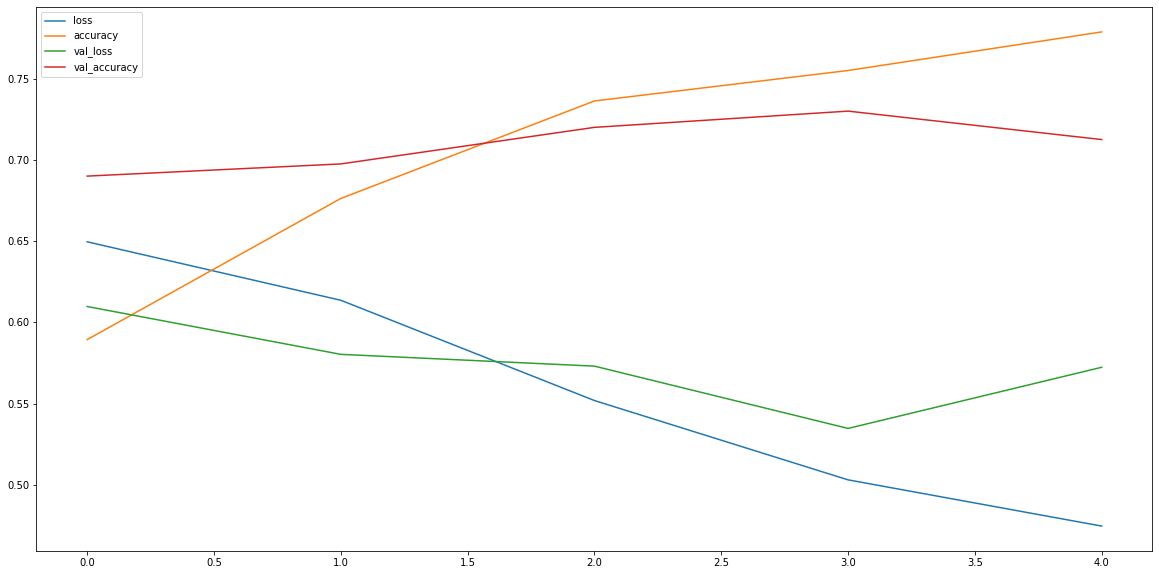

In [ ]:
pd.DataFrame(history_4.history).plot(figsize = (20,10)) #Plot models training curves

In [ ]:
#Add more Data with Augmentation to avoid Overfitting
#Increasing the amount of data by adding slightly modified versions of existing data. Images are rotated, cropped, sheared, zoomed, flipped, etc.
# Augmenting this data doesn't change the images, but instead loads here when executed
data_augmentation =  Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
tf.random.set_seed(72)
model_5 = Sequential([
    data_augmentation,
    Conv2D(filters = 10,
           kernel_size = 3, # can also be (3, 3)
           input_shape = (256,256,3),
           activation = 'relu'), # first layer specifies input shape (height, width, colour channels)
    MaxPool2D(pool_size = 2, #or (2,2)
              padding = 'valid'), #or 'same'
    Conv2D(10, 3, activation = 'relu'), # Filters, Kernel Size, activation
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid') # Binary activation output layer
])
#Compile the Model 
model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
#Fit the Model
history_5 = model_5.fit(training_data_norm,
                        steps_per_epoch = len(training_data_norm), #Steps through 50 batches of 32
                        epochs = 20,
                        validation_data = validation_data_norm, #Validate while fitting
                        validation_steps = len(validation_data_norm) # Steps through test data in batches of 32
                        )

Epoch 1/20
50/50 [==============================] - 8s 127ms/step - loss: 0.6302 - accuracy: 0.6388 - val_loss: 0.5814 - val_accuracy: 0.7075
Epoch 2/20
50/50 [==============================] - 11s 204ms/step - loss: 0.6023 - accuracy: 0.6825 - val_loss: 0.6179 - val_accuracy: 0.6400
Epoch 3/20
50/50 [==============================] - 12s 211ms/step - loss: 0.5823 - accuracy: 0.6969 - val_loss: 0.6235 - val_accuracy: 0.6350
Epoch 4/20
50/50 [==============================] - 9s 162ms/step - loss: 0.5751 - accuracy: 0.7194 - val_loss: 0.5240 - val_accuracy: 0.7375
Epoch 5/20
50/50 [==============================] - 6s 117ms/step - loss: 0.5563 - accuracy: 0.7256 - val_loss: 0.5377 - val_accuracy: 0.7300
Epoch 6/20
50/50 [==============================] - 8s 137ms/step - loss: 0.5385 - accuracy: 0.7469 - val_loss: 0.5353 - val_accuracy: 0.7325
Epoch 7/20
50/50 [==============================] - 7s 115ms/step - loss: 0.5093 - accuracy: 0.7588 - val_loss: 0.5065 - val_accuracy: 0.7475
Epoc

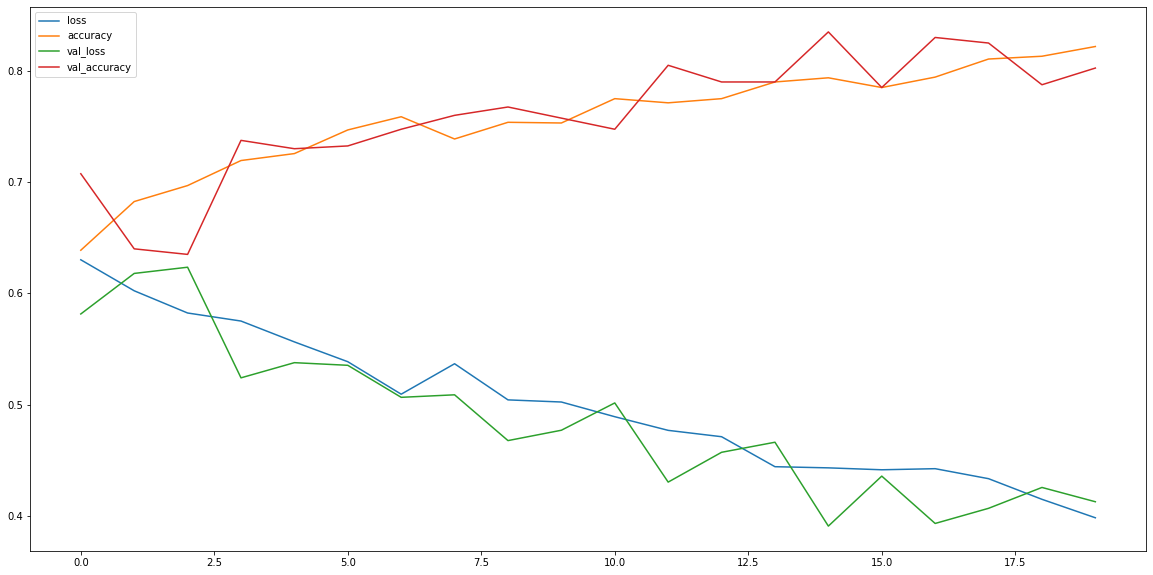

In [ ]:
pd.DataFrame(history_5.history).plot(figsize = (20,10)) #Plot models training curves

In [ ]:
#Save the model
model_5.save("Binary_CNN_Model")

In [ ]:
saved_model_cnn = tf.keras.models.load_model("Binary_CNN_Model") #Load trained Model
saved_model_cnn.evaluate(validation_data_norm)

13/13 [==============================] - 1s 41ms/step - loss: 0.4127 - accuracy: 0.8025


[0.41266220808029175, 0.8025000095367432]